<a href="https://colab.research.google.com/github/sharad28/Handon_DeepLearning/blob/main/1_starting_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full), (x_test,y_test) = fashion_mnist.load_data()

In [11]:
x_train_full.shape

(60000, 28, 28)

In [12]:
x_train_full.dtype

dtype('uint8')

In [13]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [22]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [23]:
class_names[y_train[0]]

'Coat'

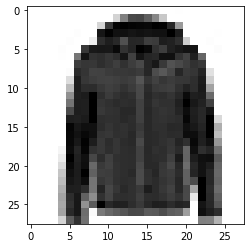

In [24]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='binary')

##Creating the model using the Sequential API

> simplest kind of keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the **Sequential API**.
 




In [25]:
model = keras.models.Sequential()
#convert each input image into 1D array: if receive input data X, it compute x.reshape(-1,1)
#see below for x.reshape(-1,1) operation
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [38]:
print(x_train[0].shape)
x_train[0].reshape(-1,1).shape

(28, 28)


(784, 1)

same can be acheived by passing in list

In [39]:
model = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300,activation='relu'),
     keras.layers.Dense(100,activation='relu'),
     keras.layers.Dense(10,activation='softmax'),
     
    ]
)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


No. of parameters are calculated as follows:


1.   first hidden layer has 784 x 300 connection weights, plus 300 bias terms (784x300+300=235500)
2.   second hidden layer has 300 x 100 connection weights, plus 100 bias terms (300x100+100=30100)
3.   third hidden layer has 100x10 connection weights, plus 10 bias terms (100x10+10=1010) 



In [42]:
# model layers can be easily access
model.layers

In [44]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [47]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04295737,  0.02101772,  0.05274901, ..., -0.03915269,
        -0.00829954, -0.03148969],
       [-0.0336108 , -0.06414886, -0.0685553 , ..., -0.06559546,
         0.05819616, -0.04486308],
       [-0.04307246,  0.0254877 , -0.03017638, ...,  0.05342619,
         0.02773432,  0.06404303],
       ...,
       [ 0.05786645, -0.05571006,  0.0482626 , ...,  0.05127037,
        -0.04083202,  0.06633456],
       [-0.04206158,  0.02893569, -0.06185933, ...,  0.04255515,
        -0.04377949,  0.01729473],
       [ 0.03112947,  0.04932588, -0.04815742, ...,  0.00667749,
        -0.01217585, -0.05668362]], dtype=float32)

In [48]:
weights.shape

(784, 300)

In [49]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [50]:
biases.shape

(300,)

Compile method to specify the loss function and the optimizer to use

In [51]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model is ready for training

In [52]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6997 - accuracy: 0.7682 - val_loss: 0.5203 - val_accuracy: 0.8178
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4847 - accuracy: 0.8314 - val_loss: 0.4342 - val_accuracy: 0.8542
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4420 - accuracy: 0.8442 - val_loss: 0.4313 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8537 - val_loss: 0.3941 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3958 - accuracy: 0.8605 - val_loss: 0.3976 - val_accuracy: 0.8608
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3790 - accuracy: 0.8646 - val_loss: 0.3743 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3658 - accuracy: 0.8701 - val_loss: 0.4057 - val_accuracy:

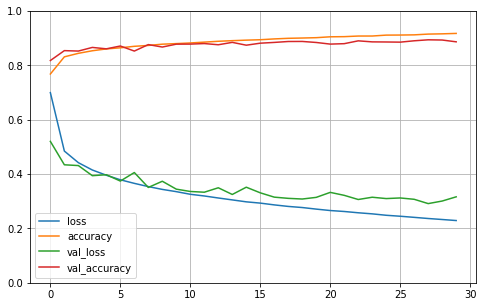

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

